<a href="https://colab.research.google.com/github/vishnuvryeruva/Connected-deep-learning-netwroks/blob/main/Neuron_%26_PyTorch_with_lightening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Installing Dependency

In [ ]:
!pip install pytorch-lightning

###Colab environment

In [ ]:
!python --version

Python 3.7.12


In [ ]:
!pip list | grep tensor

tensorboard                   2.8.0
tensorboard-data-server       0.6.1
tensorboard-plugin-wit        1.8.1
tensorflow                    2.8.0
tensorflow-datasets           4.0.1
tensorflow-estimator          2.8.0
tensorflow-gcs-config         2.8.0
tensorflow-hub                0.12.0
tensorflow-io-gcs-filesystem  0.24.0
tensorflow-metadata           1.7.0
tensorflow-probability        0.16.0


In [ ]:
!pip list | grep torch

pytorch-lightning             1.5.10
torch                         1.10.0+cu111
torchaudio                    0.10.0+cu111
torchmetrics                  0.7.2
torchsummary                  1.5.1
torchtext                     0.11.0
torchvision                   0.11.1+cu111


###Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pytorch_lightning as pl
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from typing import Callable

## Basic regression with a linear model

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


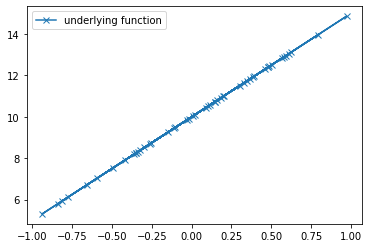

In [ ]:
n = 50
d = 1
x = np.random.uniform(-1, 1, (n, d))
weights = np.array([[5],])
bias = np.array([10])

y_true = x @ weights + bias
print(f'x: {x.shape}, weights: {weights.shape}, bias: {bias.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

### Basic prediction function: Linear

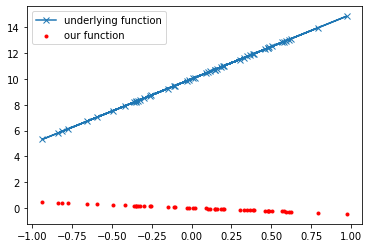

In [ ]:
class Linear:
  def __init__(self, input_dim, num_hidden=1):
    self.wt = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    return x @ self.wt + self.bias

ln = Linear(d)
y_pred = ln(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()

### Basic loss function: MSE


In [ ]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()
  
loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 110.95402496811106


### Add back propagation

In [ ]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.wt = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.wt + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.wt.T
    return self.x_gradient

  def update(self, lr):
    self.wt = self.wt - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [ ]:
loss = MSE()
ln = Linear(d)
y_pred = ln(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
ln.backward(loss_gradient)
ln.update(0.1)
y_pred = ln(x)
print(loss(y_pred, y_true))

108.09020004693797
69.99880876864779


### Train using gradient descent!

Epoch 0, loss 104.17970730706735
Epoch 5, loss 11.732715437296985
Epoch 10, loss 1.6544440927331798
Epoch 15, loss 0.440866830064571
Epoch 20, loss 0.2207833290065382
Epoch 25, loss 0.1377726925857471
Epoch 30, loss 0.08978503603138303
Epoch 35, loss 0.05894073115992835


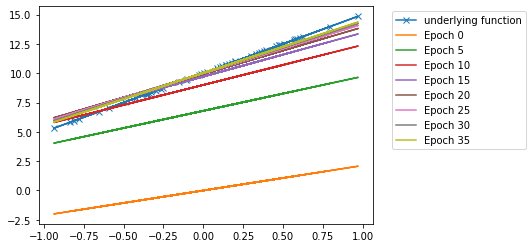

In [ ]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
ln = Linear(d)

num_epochs = 40
lr = 0.1

for epoch in range(num_epochs):
  y_pred = ln(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')

  gradient_from_loss = loss.backward()
  ln.backward(gradient_from_loss)
  ln.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

### 2-D Inputs

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


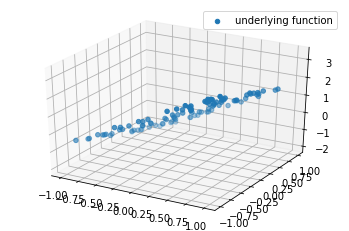

In [ ]:
n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights = np.array([[2, -1], ]).T
bias = np.array([0.5])
print(x.shape, weights.shape, bias.shape)

y_true = x @ weights + bias
print(f'x: {x.shape}, weights: {weights.shape}, bias: {bias.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

7.163033590393727


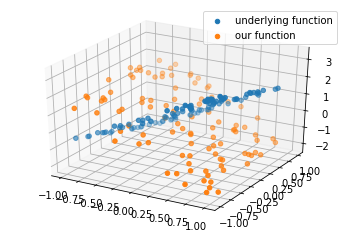

In [ ]:
loss = MSE()
ln = Linear(2)
y_pred = ln(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 7.163033590393727
Epoch 1, loss 5.930590070766938
Epoch 2, loss 4.924897574175626
Epoch 3, loss 4.099288676125286
Epoch 4, loss 3.4182678732140657
Epoch 5, loss 2.854392225745963
Epoch 6, loss 2.386131644388894
Epoch 7, loss 1.996378384310598
Epoch 8, loss 1.6713910128587133
Epoch 9, loss 1.4000325691230657
Epoch 10, loss 1.1732106654905783
Epoch 11, loss 0.9834583707248717
Epoch 12, loss 0.824614922202923
Epoch 13, loss 0.6915785203509102
Epoch 14, loss 0.5801121453992087
Epoch 15, loss 0.4866890985443145
Epoch 16, loss 0.40836882980890643
Epoch 17, loss 0.3426962319806789
Epoch 18, loss 0.287619379027663
Epoch 19, loss 0.24142194355045762


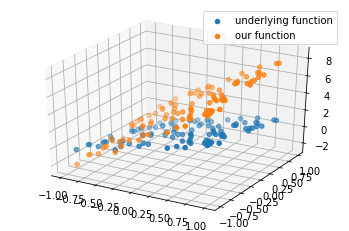

In [ ]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model=ln, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, linear(x))

## Basic regression with a Multi-layer Perceptron

So, we now have a way to automatically fit a linear function to N-dimensional data.

How can this be made to work for non-linear data?

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


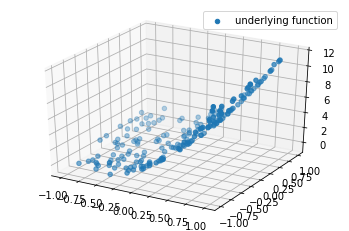

In [ ]:

n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights = np.array([[5, 1],]).T
bias = np.array([1])

y_true = (x ** 2) @ weights + x @ weights + bias
print(f'x: {x.shape}, weights: {weights.shape}, bias: {bias.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

Epoch 0, loss 24.81891264649211
Epoch 1, loss 19.27132564008574
Epoch 2, loss 15.372128471821966
Epoch 3, loss 12.573913722086296
Epoch 4, loss 10.520450888934404
Epoch 5, loss 8.978550085770994
Epoch 6, loss 7.794399750644182
Epoch 7, loss 6.865561688684798
Epoch 8, loss 6.122986427554036
Epoch 9, loss 5.519444340099264
Epoch 10, loss 5.022067232329233
Epoch 11, loss 4.60752568110159
Epoch 12, loss 4.258898433803587
Epoch 13, loss 3.9636297309804744
Epoch 14, loss 3.7121875616015747
Epoch 15, loss 3.4971747625035743
Epoch 16, loss 3.312733750234584
Epoch 17, loss 3.1541425643331436
Epoch 18, loss 3.0175363371856374
Epoch 19, loss 2.8997116584434184
Epoch 20, loss 2.7979862841728584
Epoch 21, loss 2.71009626559354
Epoch 22, loss 2.6341187662238807
Epoch 23, loss 2.568412831845487
Epoch 24, loss 2.511572963306951
Epoch 25, loss 2.4623920223577915
Epoch 26, loss 2.41983109847474
Epoch 27, loss 2.382994686976835
Epoch 28, loss 2.3511100083279226
Epoch 29, loss 2.3235096205834447
Epoch 30,

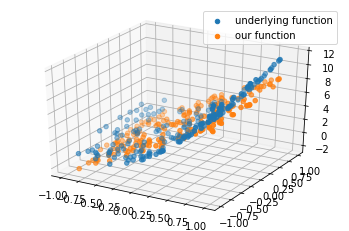

In [ ]:
loss = MSE()
ln = Linear(d)
fit(x, y_true, model=ln, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, ln(x))

### Add non-linearity: ReLU

In [ ]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


### Train our new non-linear model

17.190742701672008


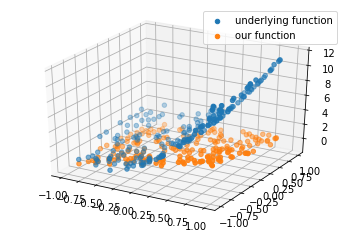

In [ ]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.ln1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.ln2 = Linear(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.ln1(x)
    r = self.relu(l1)
    l2 = self.ln2(r)
    return l2
  
  def backward(self, output_gradient):
    ln2_gradient = self.ln2.backward(output_gradient)
    relu_gradient = self.relu.backward(ln2_gradient)
    ln1_gradient = self.ln1.backward(relu_gradient)
    return ln1_gradient

  def update(self, lr):
    self.ln2.update(lr)
    self.ln1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

In [ ]:
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

18.261685590492434
8.080907878522106


Epoch 0, loss 8.080907878522106
Epoch 1, loss 4.399022336432746
Epoch 2, loss 2.724990840964866
Epoch 3, loss 1.778951675647953
Epoch 4, loss 1.2405217713907246
Epoch 5, loss 0.913572282904568
Epoch 6, loss 0.7060418376660605
Epoch 7, loss 0.5684034163144064
Epoch 8, loss 0.4754584849419532
Epoch 9, loss 0.4107134206813761
Epoch 10, loss 0.36258052292968285
Epoch 11, loss 0.32548152924411555
Epoch 12, loss 0.29619054356583513
Epoch 13, loss 0.27224055324008495
Epoch 14, loss 0.2522815927594065
Epoch 15, loss 0.2354658519912313
Epoch 16, loss 0.22112305500331508
Epoch 17, loss 0.2088416087495094
Epoch 18, loss 0.19823568952400586
Epoch 19, loss 0.1889447444981456
Epoch 20, loss 0.1806019950830654
Epoch 21, loss 0.1730770503470778
Epoch 22, loss 0.16639160942828787
Epoch 23, loss 0.16034803671145614
Epoch 24, loss 0.15485489142212536
Epoch 25, loss 0.14985481986754837
Epoch 26, loss 0.1453968066612786
Epoch 27, loss 0.14143831567137413
Epoch 28, loss 0.137907906480412
Epoch 29, loss 0.13

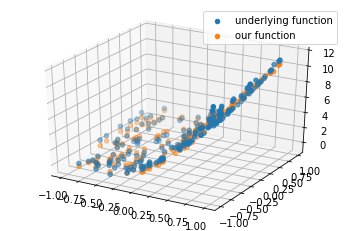

In [ ]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x))

### Using PyTorch

In [ ]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.ln1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.ln2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.ln1(x)
    r = self.relu(l1)
    l2 = self.ln2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(20.0828, grad_fn=<MseLossBackward0>)


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(20.0828, grad_fn=<MseLossBackward0>)
tensor(14.9066, grad_fn=<MseLossBackward0>)


tensor(14.9066, grad_fn=<MseLossBackward0>)
tensor(11.5449, grad_fn=<MseLossBackward0>)
tensor(8.8062, grad_fn=<MseLossBackward0>)
tensor(6.3783, grad_fn=<MseLossBackward0>)
tensor(4.3544, grad_fn=<MseLossBackward0>)
tensor(2.9445, grad_fn=<MseLossBackward0>)
tensor(2.0350, grad_fn=<MseLossBackward0>)
tensor(1.4542, grad_fn=<MseLossBackward0>)
tensor(1.1009, grad_fn=<MseLossBackward0>)
tensor(0.8927, grad_fn=<MseLossBackward0>)
tensor(0.7631, grad_fn=<MseLossBackward0>)
tensor(0.6737, grad_fn=<MseLossBackward0>)
tensor(0.6074, grad_fn=<MseLossBackward0>)
tensor(0.5555, grad_fn=<MseLossBackward0>)
tensor(0.5137, grad_fn=<MseLossBackward0>)
tensor(0.4790, grad_fn=<MseLossBackward0>)
tensor(0.4504, grad_fn=<MseLossBackward0>)
tensor(0.4271, grad_fn=<MseLossBackward0>)
tensor(0.4075, grad_fn=<MseLossBackward0>)
tensor(0.3898, grad_fn=<MseLossBackward0>)
tensor(0.3753, grad_fn=<MseLossBackward0>)
tensor(0.3627, grad_fn=<MseLossBackward0>)
tensor(0.3503, grad_fn=<MseLossBackward0>)
tensor(0.

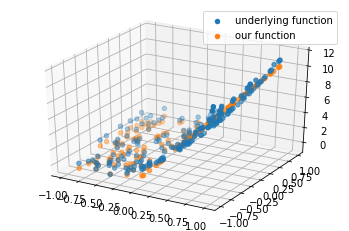

In [ ]:
def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x_tensor).detach())

###Tensorflow/Keras

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
 regression (Dense)          (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
7/7 [==============================] - 0s 3ms/step - loss: 9.0460
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 0.8208
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 0.5391
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 0.3138
Epoch 5/10
7/7

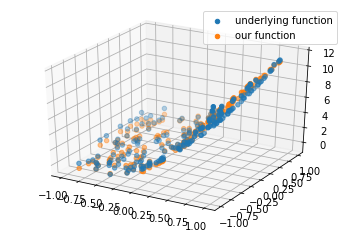

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_3d(x, y_true, model(x))

###Using PyTorch-Lightning

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.datasets import MNIST
from torchvision import transforms
import pytorch_lightning as pl

class LitAutoEncoder(pl.LightningModule):
	def __init__(self):
		super().__init__()
		self.encoder = nn.Sequential(
      nn.Linear(28 * 28, 64),
      nn.ReLU(),
      nn.Linear(64, 3))
		self.decoder = nn.Sequential(
      nn.Linear(3, 64),
      nn.ReLU(),
      nn.Linear(64, 28 * 28))

	def forward(self, x):
		embedding = self.encoder(x)
		return embedding

	def configure_optimizers(self):
		optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
		return optimizer

	def training_step(self, train_batch, batch_idx):
		x, y = train_batch
		x = x.view(x.size(0), -1)
		z = self.encoder(x)    
		x_hat = self.decoder(z)
		loss = F.mse_loss(x_hat, x)
		self.log('train_loss', loss)
		return loss

	def validation_step(self, val_batch, batch_idx):
		x, y = val_batch
		x = x.view(x.size(0), -1)
		z = self.encoder(x)
		x_hat = self.decoder(z)
		loss = F.mse_loss(x_hat, x)
		self.log('val_loss', loss)

df = MNIST('', train=True, download=True, transform=transforms.ToTensor())
mnist_train, mnist_val = random_split(df, [55000, 5000])

train_loader = DataLoader(mnist_train, batch_size=1024)
val_loader = DataLoader(mnist_val, batch_size=1024)

model = LitAutoEncoder()

trainer = pl.Trainer(gpus=1)
trainer.fit(model, train_loader, val_loader)


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | encoder | Sequential | 50.4 K
1 | decoder | Sequential | 51.2 K
---------------------------------------
101 K     Trainable params
0         Non-trainable params
101 K     Total params
0.407     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:688: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


#References:
#####https://colab.research.google.com/drive/1HS3qbHArkqFlImT2KnF5pcMCz7ueHNvY?usp=sharing&authuser=1#scrollTo=EGkS6nN6dQaz
#####https://www.pytorchlightning.ai/